In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [2]:
np.random.seed(0)
date_range = pd.date_range(start='2020-01-01', periods=100, freq='D')
data = np.random.randn(100).cumsum()  

In [3]:
time_series = pd.Series(data, index=date_range)

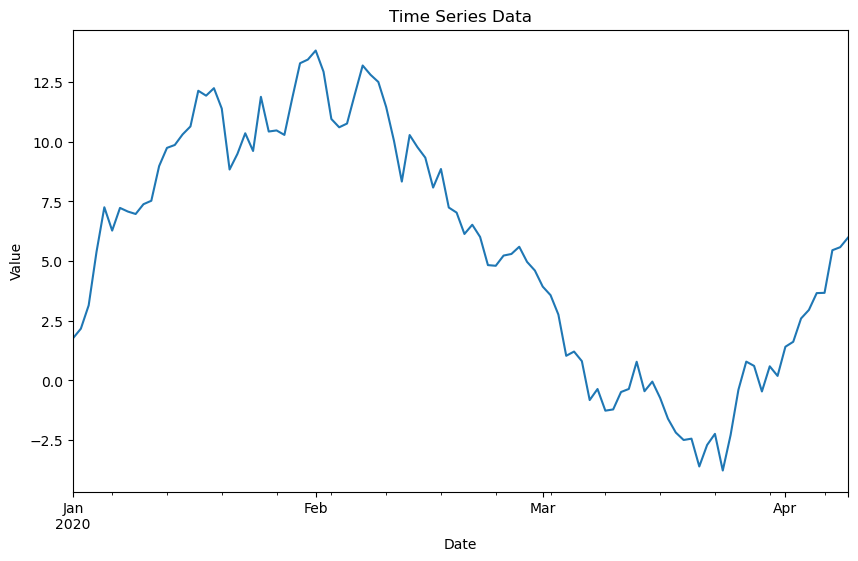

In [4]:
plt.figure(figsize=(10, 6))
time_series.plot()
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

In [5]:
train_size = int(len(time_series) * 0.8)
train, test = time_series[0:train_size], time_series[train_size:]


model = ARIMA(train, order=(5, 1, 0))
model_fit = model.fit()

forecast_steps = len(test)
forecast = model_fit.forecast(steps=forecast_steps)


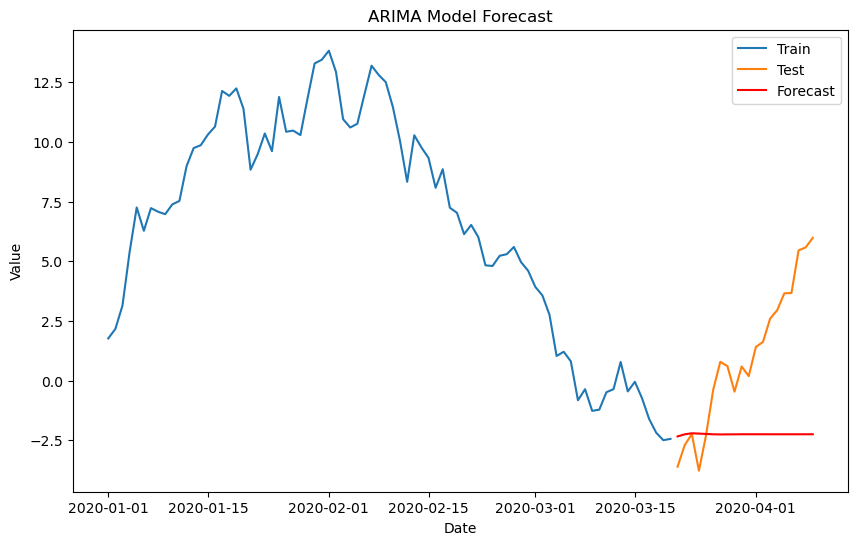

Mean Squared Error: 18.971368314931574
Mean Absolute Error: 3.567021348172239


In [8]:
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, forecast, label='Forecast', color='red')
plt.title('ARIMA Model Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(test, forecast)
mae = mean_absolute_error(test, forecast)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')